@Author: Pooja
@Date: 18-11-2024
@Last modified by:Pooja
@Last modified Date:11-10-2024
@Title: Single layer neural network to predict whether customer will exit

Importing Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import seaborn as sns

Load Dataset

In [3]:
data = pd.read_csv('classification_2.csv')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


anaysing dataset

In [4]:
# data.describe()
data.isnull().sum()
#data.info()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

handling outliers

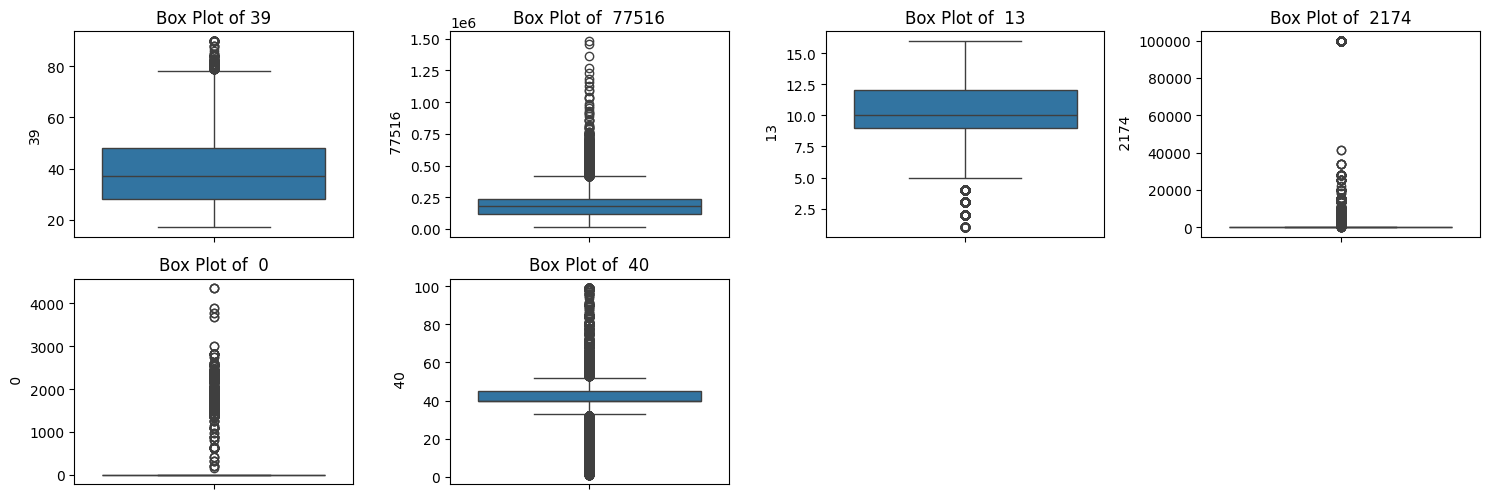

In [5]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()        # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()

plt.show()

Original data shape: (32560, 15)
Filtered data shape: (18997, 15)


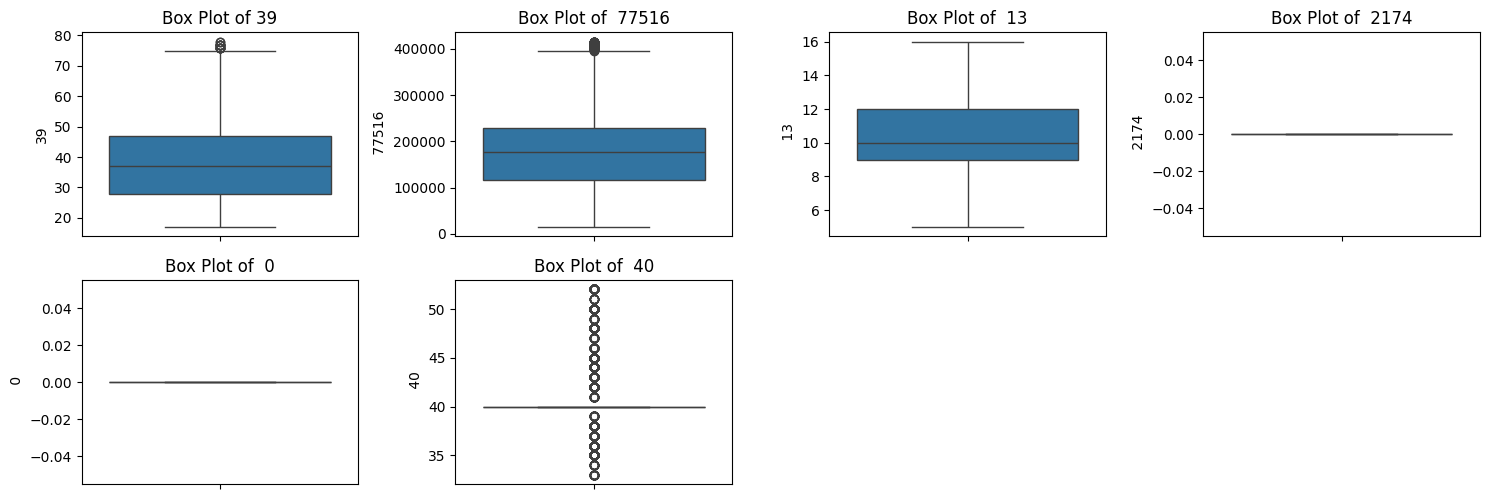

In [6]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data to remove outliers
df_filtered = data[~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {data.shape}')
print(f'Filtered data shape: {df_filtered.shape}')
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

handling categorical data

In [7]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
le = LabelEncoder()
# Apply label encoding to each categorical column
for column in categorical_columns:
    df_filtered[column] = le.fit_transform(df_filtered[column])

print(df_filtered)

       39   State-gov   77516   Bachelors   13   Never-married   Adm-clerical  \
1      38           4  215646           8    9               0              6   
2      53           4  234721           1    7               2              6   
3      28           4  338409           6   13               2             10   
4      37           4  284582           9   14               2              4   
6      52           6  209642           8    9               2              4   
...    ..         ...     ...         ...  ...             ...            ...   
32553  53           4  321865           9   14               2              4   
32554  22           4  310152          11   10               4             11   
32555  27           4  257302           4   12               2             13   
32556  40           4  154374           8    9               2              7   
32557  58           4  151910           8    9               6              1   

        Not-in-family   Whi

C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_21260\2655845802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_21260\2655845802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\pooja konduri\AppData\Local\Temp\ipykernel_21260\2655845802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

splitting target variable and feaTure

In [8]:
X = df_filtered.drop(' <=50K',axis=1)
y = df_filtered[' <=50K']
y

1        0
2        0
3        0
4        0
6        1
        ..
32553    1
32554    0
32555    0
32556    1
32557    0
Name:  <=50K, Length: 18997, dtype: int64

splitting and feature scaling

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already-fitted scaler
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of standardized X_train:\n", X_train_scaled[:5])

First 5 rows of standardized X_train:
 [[-0.75173588  0.09387141 -0.6256436   0.17756976 -0.57447602  1.61597733
   1.32551813  1.60344772  0.40690535 -1.42298298  0.          0.
  -1.63569837  0.27710986]
 [ 0.57976722  0.09387141 -1.17815012 -0.53869503  1.2862043   2.27276659
   0.3747512   0.97918182 -3.04641219 -1.42298298  0.          0.
  -0.37252642 -0.9311644 ]
 [ 1.16229983  0.09387141 -0.47652698 -2.32935701 -1.50481617 -0.35439047
  -0.81370747 -0.89361587  0.40690535  0.70274909  0.          0.
  -0.37252642  0.27710986]
 [ 0.57976722  0.09387141 -0.45770342  1.25196694 -0.10930594  2.27276659
   0.3747512   1.60344772 -1.89530634 -1.42298298  0.          0.
  -0.37252642  0.27710986]
 [-1.41748743  0.09387141 -1.22699708  1.25196694 -0.10930594  0.95918806
  -0.57601574  0.97918182  0.40690535 -1.42298298  0.          0.
  -0.37252642  0.27710986]]


Build Model

In [22]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Input layer and first hidden layer with Batch Normalization
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.3))          # Add Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,                   # Increase epochs for better training
    batch_size=32,                # Experiment with batch size
    validation_split=0.2,         # Use validation split
    verbose=1,
    callbacks=[early_stopping] 
)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

Epoch 1/20


c:\Users\pooja konduri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6597 - loss: 0.6230 - val_accuracy: 0.8240 - val_loss: 0.3780
Epoch 2/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.4166 - val_accuracy: 0.8283 - val_loss: 0.3572
Epoch 3/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.4125 - val_accuracy: 0.8355 - val_loss: 0.3461
Epoch 4/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8139 - loss: 0.3950 - val_accuracy: 0.8401 - val_loss: 0.3434
Epoch 5/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8157 - loss: 0.3783 - val_accuracy: 0.8391 - val_loss: 0.3411
Epoch 6/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.3803 - val_accuracy: 0.8365 - val_loss: 0.3415
Epoch 7/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8140 - loss: 0.3792 - val_accuracy: 0.8388 - val_loss: 0.3406
Epoch 8/20
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8184 - loss: 0.3831 - val_accuracy: 0.8378 - val_

model performance

In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[2797  192]
 [ 440  371]]
Accuracy: 0.8336842105263158
